In [1]:
import tensorflow as tf

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras import models,layers 

In [3]:
import splitfolders

In [4]:
splitfolders.ratio(r"C:\Users\nitisha.reddy\Documents\Intellipaat\Datasets\Potato", output="potato_output",
    seed=1337, ratio=(.8, .1,.1), group_prefix=None, move=False)

In [5]:
Image_size = 256
Batch_size = 32

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [50]:
trainset = ImageDataGenerator(rescale=1./255,horizontal_flip=True,vertical_flip=True,rotation_range=20,fill_mode='nearest',shear_range=0.2,width_shift_range=0.2,height_shift_range=0.2,zoom_range=0.2)
valset  = ImageDataGenerator(rescale=1./255)
traingen = trainset.flow_from_directory("potato_output/train",shuffle=True,class_mode = 'sparse',target_size=(Image_size,Image_size),batch_size=Batch_size)
valgen  = valset.flow_from_directory("potato_output/val",shuffle=False,class_mode = 'sparse',target_size=(Image_size,Image_size),batch_size=Batch_size)
testgen = valset.flow_from_directory("potato_output/test",shuffle=False,class_mode = 'sparse',target_size=(Image_size,Image_size),batch_size=Batch_size)

Found 1721 images belonging to 3 classes.
Found 215 images belonging to 3 classes.
Found 216 images belonging to 3 classes.


In [51]:
traingen.class_indices

{'Potato___Early_blight': 0, 'Potato___Late_blight': 1, 'Potato___healthy': 2}

In [9]:
%matplotlib inline
import matplotlib.image as mpimg

In [10]:
import PIL
from PIL import Image

In [12]:
from tensorflow.keras.preprocessing import image

In [56]:
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

In [27]:
channels=3

In [52]:
input_shape = (Image_size, Image_size, channels)
n_classes = 3

cnn = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(3, activation='softmax'),
])

In [53]:
cnn.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [54]:
history = cnn.fit(
    traingen,
    validation_data=valgen,
    verbose=1,
    epochs=50,callbacks=[callback]
)

Epoch 1/50
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
54/54 [==============================] - ETA: 0s - loss: 0.8903 - accuracy: 0.5456WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x000002712230B4C8> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) 

In [57]:
y_true = testgen.classes
y_pred = np.argmax(cnn.predict(testgen), axis=-1) 
print(classification_report(y_true, y_pred))

7/7 [==============================] - 9s 1s/step
              precision    recall  f1-score   support

           0       0.88      1.00      0.94       100
           1       1.00      0.86      0.92       100
           2       0.94      1.00      0.97        16

    accuracy                           0.94       216
   macro avg       0.94      0.95      0.94       216
weighted avg       0.94      0.94      0.93       216



In [58]:
cm = pd.DataFrame(confusion_matrix(y_true, y_pred)).rename_axis('Actual').rename_axis('Predicted', axis=1)
cm

Predicted,0,1,2
Actual,,,
0,100,0,0
1,13,86,1
2,0,0,16


In [64]:
class_names = list(traingen.class_indices.keys())
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [65]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = cnn.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 90ms/step


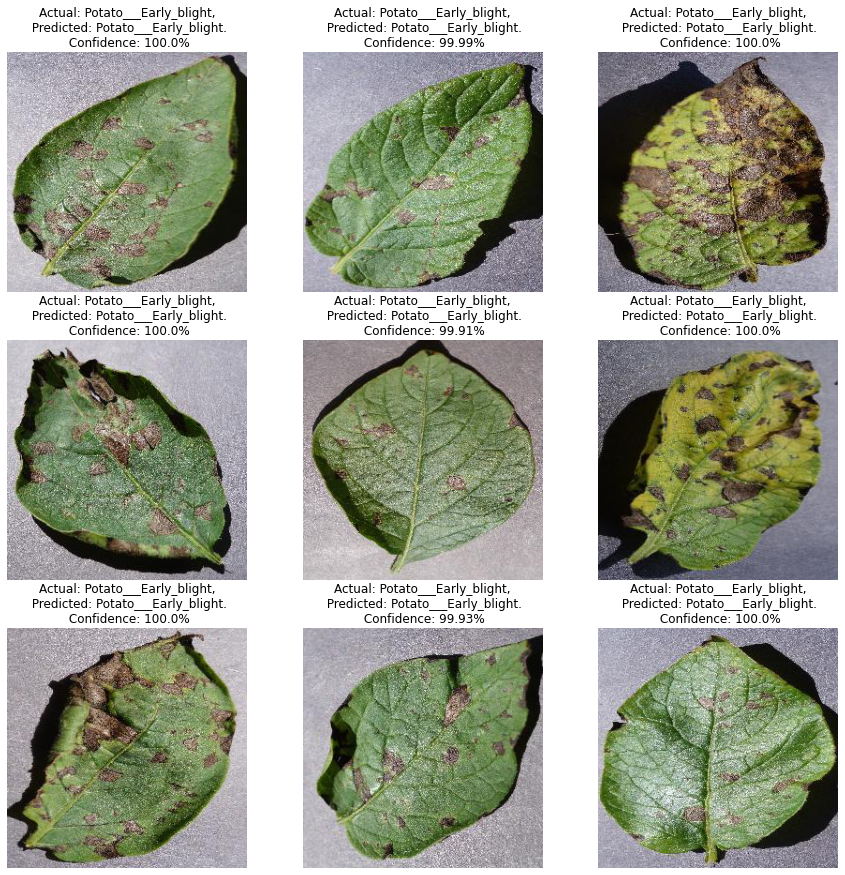

In [66]:
plt.figure(figsize=(15, 15))
for images, labels in testgen:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(cnn, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break